In [1]:
import numpy as np
from helpers import exp_range, plot_learning_curve, plot_validation_curve, fit_and_score_iteratively, plot_curves

import pydotplus
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from classes import BalancedUndersamplingShuffle, balanced_sampling
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import fbeta_score, make_scorer


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


# Baseline Model

In [12]:
# no undersampling
# Baseline model
# using non one-hot encoded y's

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)


In [13]:
print(train_res, test_res)

1.0 0.8081


In [14]:
# no undersampling
# Baseline model
# using one-hot encoded y's

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)
print(train_res, test_res)

1.0 0.8101


In [15]:
print(train_res, test_res)

1.0 0.8101


In [17]:
print(classifier.get_depth())

24


# Validation Curves and tuning

### max_depth

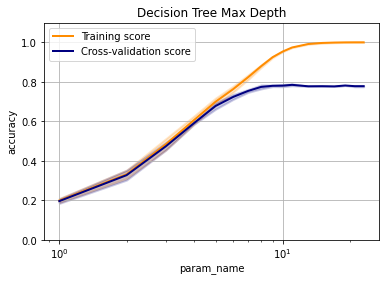

In [3]:
# max_depth - accuracy
param_range = list(range(1, 11)) + list(range(11, 25, 2))

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='Decision Tree Max Depth')



In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

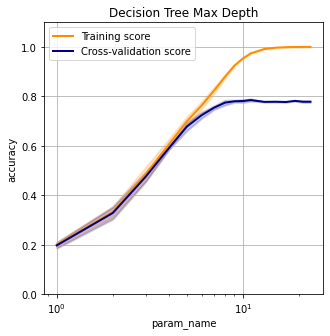

In [5]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Decision Tree Max Depth',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [6]:
labeled_test

array([[ 1.    ,  0.1852,  0.2084],
       [ 2.    ,  0.3032,  0.3528],
       [ 3.    ,  0.4938,  0.455 ],
       [ 4.    ,  0.5968,  0.5846],
       [ 5.    ,  0.6944,  0.6614],
       [ 6.    ,  0.7364,  0.7114],
       [ 7.    ,  0.7616,  0.747 ],
       [ 8.    ,  0.7844,  0.7644],
       [ 9.    ,  0.7842,  0.776 ],
       [10.    ,  0.7866,  0.7754],
       [11.    ,  0.7896,  0.7804],
       [13.    ,  0.7772,  0.778 ],
       [15.    ,  0.7766,  0.7796],
       [17.    ,  0.7766,  0.7776],
       [19.    ,  0.782 ,  0.7812],
       [21.    ,  0.7752,  0.7812],
       [23.    ,  0.7752,  0.7812]])

In [11]:
# Baseline model
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=11)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                iterations=10,binary_classification=False, include_train_results=True)
print(train_res, test_res)

0.9635999999999999 0.8126999999999999


# Min samples split

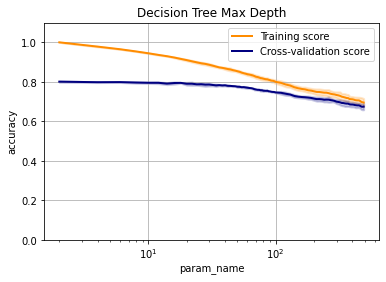

In [3]:
# max_depth - accuracy
param_range = list(range(2, 100, 2)) + list(range(100, 500, 10))

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='min_samples_split', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='Decision Tree Max Depth')




In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

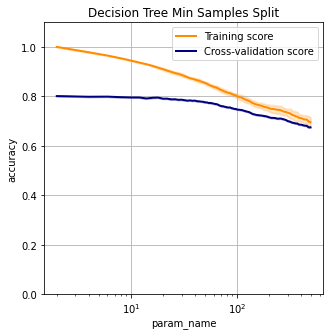

In [8]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Decision Tree Min Samples Split',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [7]:
print(labeled_test)

[[  2.       0.801 ]
 [  4.       0.7983]
 [  6.       0.7988]
 [  8.       0.7966]
 [ 10.       0.7954]
 [ 12.       0.7953]
 [ 14.       0.7913]
 [ 16.       0.7942]
 [ 18.       0.7949]
 [ 20.       0.7905]
 [ 22.       0.7906]
 [ 24.       0.7876]
 [ 26.       0.7881]
 [ 28.       0.7859]
 [ 30.       0.7864]
 [ 32.       0.7843]
 [ 34.       0.7824]
 [ 36.       0.7835]
 [ 38.       0.782 ]
 [ 40.       0.7827]
 [ 42.       0.7801]
 [ 44.       0.7796]
 [ 46.       0.7785]
 [ 48.       0.7778]
 [ 50.       0.7756]
 [ 52.       0.7752]
 [ 54.       0.773 ]
 [ 56.       0.7734]
 [ 58.       0.7719]
 [ 60.       0.7705]
 [ 62.       0.769 ]
 [ 64.       0.7682]
 [ 66.       0.7663]
 [ 68.       0.7631]
 [ 70.       0.7613]
 [ 72.       0.7598]
 [ 74.       0.7597]
 [ 76.       0.7577]
 [ 78.       0.7575]
 [ 80.       0.7554]
 [ 82.       0.755 ]
 [ 84.       0.7547]
 [ 86.       0.7551]
 [ 88.       0.7524]
 [ 90.       0.7517]
 [ 92.       0.7502]
 [ 94.       0.7492]
 [ 96.       

In [9]:
# Baseline model
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_split=2)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                iterations=10,binary_classification=False, include_train_results=True)
print(train_res, test_res)

1.0 0.8080999999999999


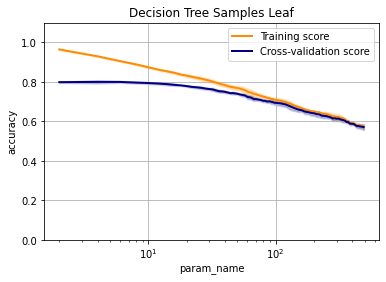

In [10]:
# max_depth - accuracy
param_range = list(range(2, 100, 2)) + list(range(100, 500, 10))

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='min_samples_leaf', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='Decision Tree Samples Leaf')




In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

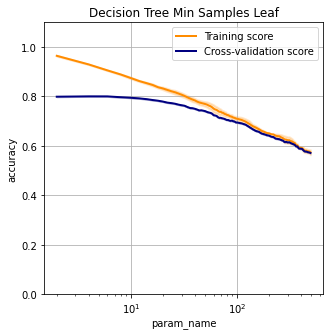

In [14]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Decision Tree Min Samples Leaf',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [13]:
print(labeled_test)

[[  2.       0.7985]
 [  4.       0.7998]
 [  6.       0.7997]
 [  8.       0.7964]
 [ 10.       0.7941]
 [ 12.       0.7916]
 [ 14.       0.7886]
 [ 16.       0.785 ]
 [ 18.       0.7822]
 [ 20.       0.7787]
 [ 22.       0.7745]
 [ 24.       0.7725]
 [ 26.       0.77  ]
 [ 28.       0.7664]
 [ 30.       0.7639]
 [ 32.       0.7618]
 [ 34.       0.7567]
 [ 36.       0.7527]
 [ 38.       0.7518]
 [ 40.       0.7495]
 [ 42.       0.7463]
 [ 44.       0.7428]
 [ 46.       0.7434]
 [ 48.       0.7418]
 [ 50.       0.74  ]
 [ 52.       0.7368]
 [ 54.       0.7345]
 [ 56.       0.7331]
 [ 58.       0.73  ]
 [ 60.       0.7238]
 [ 62.       0.7224]
 [ 64.       0.7207]
 [ 66.       0.7154]
 [ 68.       0.7127]
 [ 70.       0.713 ]
 [ 72.       0.7112]
 [ 74.       0.7101]
 [ 76.       0.7086]
 [ 78.       0.7063]
 [ 80.       0.7042]
 [ 82.       0.7045]
 [ 84.       0.7024]
 [ 86.       0.7006]
 [ 88.       0.7012]
 [ 90.       0.7013]
 [ 92.       0.6987]
 [ 94.       0.6985]
 [ 96.       

In [16]:
# Baseline model
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=4)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                                iterations=10,binary_classification=False, include_train_results=True)
print(train_res, test_res)

0.9352 0.8110000000000002


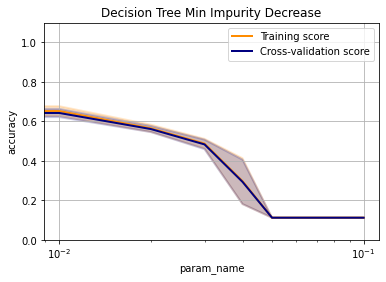

In [15]:
# max_depth - accuracy
param_range = [ x*0.01 for x in range(0, 11)]

classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='min_impurity_decrease', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='Decision Tree Min Impurity Decrease')




In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

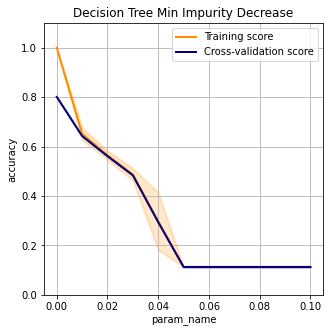

In [20]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='Decision Tree Min Impurity Decrease',
            scoring='accuracy', is_log_axis=False, 
            figsize=(5,5))

In [19]:
print(test_scores_mean)

[0.801  0.6426 0.5612 0.4836 0.294  0.1127 0.1127 0.1127 0.1127 0.1127
 0.1127]


# Learning Curves

iteration 1


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

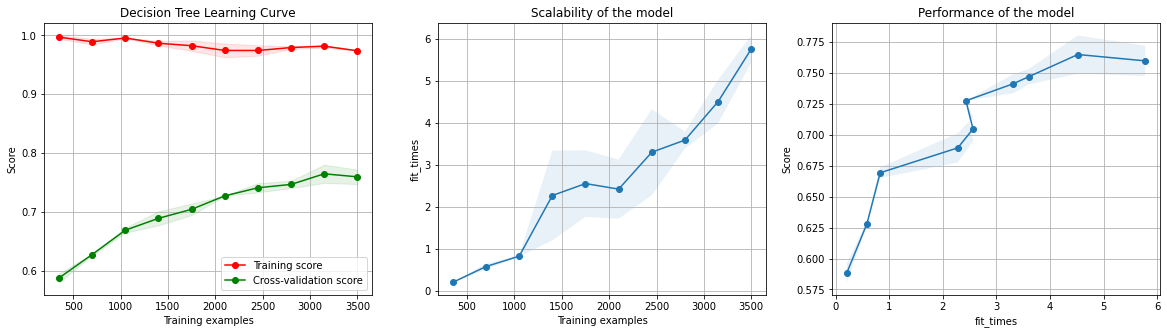

In [3]:
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=11, min_samples_split=2)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Decision Tree Learning Curve'
plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)




(60000, 784) (10000, 784) (60000, 1) (10000, 1) (60000, 10) (10000, 10)
iteration 1


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

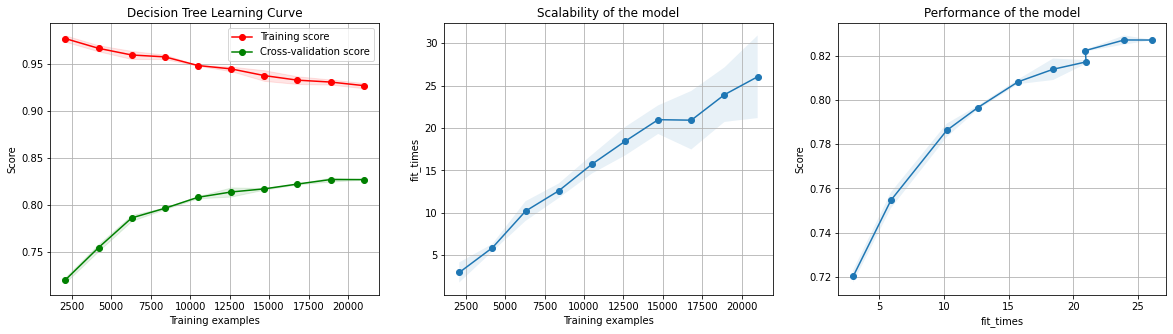

In [4]:
# giving the model more training samples:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)
    X_test = np.load(f2)
    y_train = np.load(f3)
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)

classifier = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=11, min_samples_split=2)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'Decision Tree Learning Curve'
plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)


